In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline
%run function.ipynb

df = pd.read_csv('clean8.csv')
df_copy = df.copy()
print(df_copy.shape)
df_copy.head(3)

(855794, 54)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,ApprovalDate,Term,NoEmp,...,USDPerJobCreated,loan_marturity_date,Is_Cross_State,Appv_Dusburse_delta,Default%,RealEstate,GreatRecession,DotCom,Recession,Mon_Is_14710
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,1997-02-28,84.0,4.0,...,NaN,2004-02-28,1,730.0,NaN,0.0,0.0,0.0,0.0,0.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,1997-02-28,60.0,2.0,...,NaN,2002-02-28,0,92.0,NaN,0.0,0.0,0.0,0.0,0.0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,1997-02-28,180.0,7.0,...,NaN,2012-02-28,0,306.0,NaN,0.0,0.0,0.0,0.0,0.0


In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df_copy = df_copy[(df_copy['DisbursementDate_year'] >= 2000) & (df_copy['DisbursementDate_year'] <= 2010)]
print(df_copy.shape)
df_copy.head(3)

(530453, 54)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,ApprovalDate,Term,NoEmp,...,USDPerJobCreated,loan_marturity_date,Is_Cross_State,Appv_Dusburse_delta,Default%,RealEstate,GreatRecession,DotCom,Recession,Mon_Is_14710
12,1000146010,CARVEL,APEX,NC,27502,STEARNS BK NATL ASSOC,MN,2006-02-07,162.000,2.000,...,NaN,2019-08-07,1,52.000,NaN,0.000,0.000,0.000,0.000,0.000
24,1000446006,SUBWAY,LITTLE ROCK,AR,72223,HOPE FCU,MS,2006-02-07,126.000,7.000,...,NaN,2016-08-07,1,82.000,NaN,0.000,0.000,0.000,0.000,1.000
28,1000506000,WEYLAND CORPORATION,CAMARILLO,CA,93010,WELLS FARGO BANK NATL ASSOC,SD,2006-02-07,83.000,18.000,...,106321.347,2013-01-07,1,21.000,NaN,0.000,0.000,0.000,0.000,0.000


In [4]:
df_copy['DisbursePerMonth'] = df_copy['DisbursementGross'] / df_copy['Term']
df_copy['BankLoss'] = df_copy['ChgOffPrinGr'] - df_copy['SBA_Appv']
df_copy.loc[list(df_copy[df_copy['BankLoss'] < 0].index), 'BankLoss'] = 0
df_copy['BankLoss%'] = df_copy['BankLoss'] / df_copy['DisbursementGross'] * 100

In [5]:
# df_copy.to_csv('clean9.csv', index=False)

In [6]:
obj_features = ['State', 'BankState', 'NewExist', 'IsFranchised', 'UrbanRural', 'RevLineCr', 'LowDoc', 'Industry',
                'ApprovalDate_year', 'ApprovalDate_month', 'DisbursementDate_year', 'DisbursementDate_month', 'State_division', 'RealEstate',
                'GreatRecession', 'DotCom', 'Recession', 'Mon_Is_14710', 'Is_Cross_State']
num_features = ['Default', 'ChgOffPrinGr', 'Term', 'DisbursementGross', 'Bank%', 'DisbursePerEmployee',
                'USDPerJobCreated','NoEmp', 'CreateJob', 'RetainedJob', 'Population', 'PopDensity', 'GrAppv', 'SBA_Appv',
                'HousingUnits', 'OccupiedHousingUnits', 'MedianHomeValue', 'MedianHouseholdIncome', 'Appv_Dusburse_delta', 'DisbursePerMonth']
time_cols = ['ApprovalDate_year', 'ApprovalDate_month', 'DisbursementDate_year', 'DisbursementDate_month']

df_groupby_mean = dict()
df_groupby_size = dict()
df_groupby_sum = dict()

for col in obj_features:
    df_groupby_mean[col] = df_copy.groupby(by=col).mean()[num_features]
    df_groupby_sum[col] = df_copy.groupby(by=col).sum()[num_features]
    df_groupby_size[col] = pd.DataFrame(df_copy.groupby(by=col).size())
    df_groupby_size[col].rename(columns={0: 'size'}, inplace=True)

In [7]:
display(df_copy.iloc[:3,:23])
display(df_copy.iloc[:3,23:])

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,ApprovalDate,Term,NoEmp,...,IsFranchised,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,Default,ChgOffPrinGr
12,1000146010,CARVEL,APEX,NC,27502,STEARNS BK NATL ASSOC,MN,2006-02-07,162.000,2.000,...,1.000,1,0.000,0.000,NaN,2006-03-31,307175.719,0.000,0.000,NaN
24,1000446006,SUBWAY,LITTLE ROCK,AR,72223,HOPE FCU,MS,2006-02-07,126.000,7.000,...,0.000,1,0.000,0.000,NaN,2006-04-30,166437.357,0.000,0.000,NaN
28,1000506000,WEYLAND CORPORATION,CAMARILLO,CA,93010,WELLS FARGO BANK NATL ASSOC,SD,2006-02-07,83.000,18.000,...,0.000,1,1.000,0.000,NaN,2006-02-28,531606.737,0.000,0.000,NaN


,GrAppv,SBA_Appv,Industry,ChgOffDate_year,ChgOffDate_month,ChgOffDate_day,DisbursementDate_year,DisbursementDate_month,DisbursementDate_day,ApprovalDate_year,...,Appv_Dusburse_delta,Default%,RealEstate,GreatRecession,DotCom,Recession,Mon_Is_14710,DisbursePerMonth,BankLoss,BankLoss%
12,307175.719,230381.789,Retail_trade,NaN,NaN,NaN,2006.000,3.000,31.000,2006.000,...,52.000,NaN,0.000,0.000,0.000,0.000,0.000,1896.146,NaN,NaN
24,166437.357,141471.753,Accom/Food_serv,NaN,NaN,NaN,2006.000,4.000,30.000,2006.000,...,82.000,NaN,0.000,0.000,0.000,0.000,1.000,1320.931,NaN,NaN
28,121221.673,60610.836,Educational,NaN,NaN,NaN,2006.000,2.000,28.000,2006.000,...,21.000,NaN,0.000,0.000,0.000,0.000,0.000,6404.900,NaN,NaN


In [8]:
# num = 'Default'
# for i in range(len(obj_features)):
#     if df_copy[obj_features[i]].nunique() < 8:
#             plt.figure(figsize=(10, 10))
#     elif obj_features[i] == 'Industry':
#         plt.figure(figsize=(20, 15))
#         vis = df_groupby_mean[obj_features[i]].sort_values(by=num, ascending=False)
#         title = 'Mean Default by '+ obj_features[i]
#         plt.title(title)
#         sns.set_theme(style="darkgrid")
#         plt.grid(True)
#         sns.barplot(y=vis.index, x=vis[num])
#         plt.savefig(title + '.jpeg')
#         plt.show()
#         continue
#     else:
#         plt.figure(figsize=(20, 10))
#     vis = df_groupby_mean[obj_features[i]].sort_values(by=num, ascending=False)
#     title = 'Mean Default by '+ obj_features[i]
#     plt.title(title)
#     sns.set_theme(style="darkgrid")
#     plt.grid(True)
#     sns.barplot(x=vis.index, y=vis[num])
#     plt.savefig(title + '.jpeg')
#     plt.show()

In [9]:
# num_visualization_with_hue(df_copy, num_features, hue_col='Default', exclude_outlier=1)

In [10]:
%run function.ipynb

In [11]:
# df_vis = df_copy.copy()
# hue_col = 'Default'

# for i in range(len(num_features)):
#     if num_features[i] in [hue_col, 'ChgOffPrinGr']:
#         continue

#     num_col = num_features[i]
#     vis = df_vis[[num_col, hue_col]]
#     vis = vis[~(pd.isnull(vis[num_features[i]]))]

#     upb = np.percentile(vis, 97.5)
#     lwb = np.percentile(vis, 2.5)
#     vis = vis[(vis[num_col] >= lwb) & (vis[num_col] <= upb)]

#     plt.figure(figsize=(20, 10))
#     sns.set_theme(style="darkgrid")
#     title = num_col + '_ecdf'
#     plt.title(title)
#     plt.hlines(y=0.5, xmin=df_copy[num_col].min(), xmax=df_copy[num_col].max(), colors='r', linestyles='dashed')
#     sns.ecdfplot(data=df_copy, x=num_col, hue='Default', palette=sns.color_palette("Set2")[:2])
#     plt.savefig(title + '.jpeg')
#     plt.show()
#     df_vis = df_copy.copy()

In [12]:
# num_visualization(df_copy, num_features=['BankLoss'], exclude_outlier=2.5)

In [13]:
# num_col = 'BankLoss'
# df_vis = df_copy.copy()
# df_vis = df_vis[~(pd.isnull(df_vis[num_col]))]

# upb = np.percentile(df_vis[num_col], 99)
# df_vis = df_vis[(df_vis[num_col] <= upb)]

# plt.figure(figsize=(20, 10))
# sns.set_theme(style="darkgrid")
# title = num_col + '_ecdf'
# plt.title(title)
# plt.hlines(y=0.5, xmin=df_vis[num_col].min(), xmax=df_vis[num_col].max(), colors='r', linestyles='dashed')
# sns.ecdfplot(data=df_vis, x=num_col, palette=sns.color_palette("Set2")[:2])
# plt.savefig(title + '.jpeg')
# plt.show()

In [14]:
# num_col = 'BankLoss%'
# df_vis = df_copy.copy()
# df_vis = df_vis[~(pd.isnull(df_vis[num_col]))]

# upb = np.percentile(df_vis[num_col], 99)
# df_vis = df_vis[(df_vis[num_col] <= upb)]

# plt.figure(figsize=(20, 10))
# sns.set_theme(style="darkgrid")
# title = num_col + '_ecdf'
# plt.title(title)
# plt.hlines(y=0.5, xmin=df_vis[num_col].min(), xmax=df_vis[num_col].max(), colors='r', linestyles='dashed')
# sns.ecdfplot(data=df_vis, x=num_col, palette=sns.color_palette("Set2")[:2])
# plt.savefig(title + '.jpeg')
# plt.show()

In [15]:
df_copy['BankLoss'].describe()

count    135109.000
mean      10493.938
std       19249.789
min           0.000
25%           0.000
50%        3484.054
75%       14437.295
max     1213184.643
Name: BankLoss, dtype: float64

In [16]:
df_copy['BankLoss%'].describe()

count   135109.000
mean        12.232
std         13.942
min          0.000
25%          0.000
50%          7.223
75%         21.458
max         69.798
Name: BankLoss%, dtype: float64

In [17]:
df_copy['Default'].describe()

count   530453.000
mean         0.257
std          0.437
min          0.000
25%          0.000
50%          0.000
75%          1.000
max          1.000
Name: Default, dtype: float64

In [18]:
df_copy['Default'].value_counts()

0.000    394129
1.000    136324
Name: Default, dtype: int64

In [19]:
df_copy['ChgOffPrinGr'].sum() / 10

1029063996.9125255

In [20]:
df_copy['ChgOffPrinGr'].sum() / df_copy['DisbursementGross'].sum()

0.08201160749979357

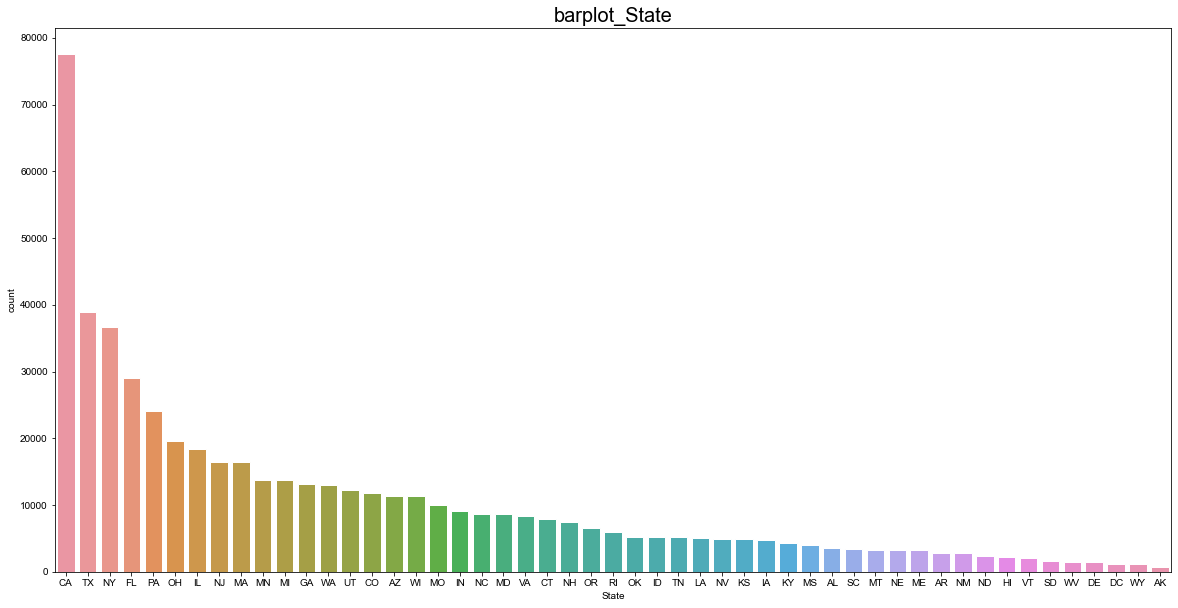

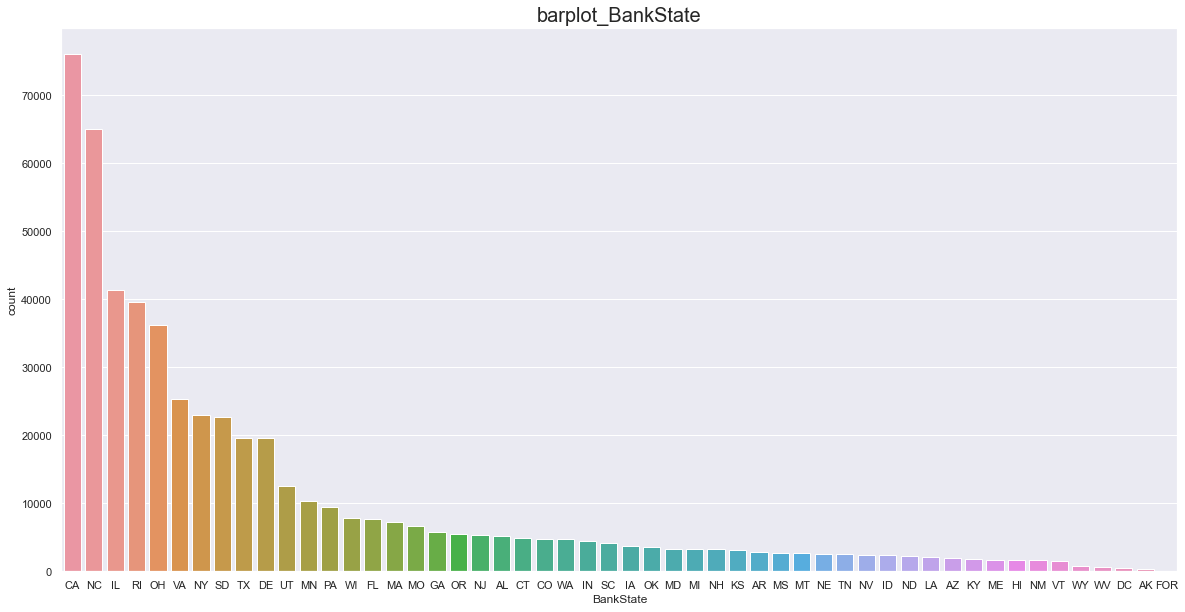

In [21]:
obj_visualization(df_copy, obj_features=['State', 'BankState'])

In [82]:
print(df_copy['Is_Cross_State'].mean())
df_copy['Is_Cross_State'].value_counts()

0.5692926611782759


1    301983
0    228470
Name: Is_Cross_State, dtype: int64

In [84]:
df_nc_cross = df_copy[(df_copy['Is_Cross_State'] == 1) & (df_copy['BankState'] == 'NC')]
df_nc_cross['Bank'].value_counts()[:10]

BANK OF AMERICA NATL ASSOC        56246
BRANCH BK. & TR CO                 2175
FIRST-CITIZENS BK & TR CO          1083
WELLS FARGO BANK NATL ASSOC         412
SURREY BANK & TRUST                  50
LIVE OAK BANKING COMPANY             46
PNC BANK, NATIONAL ASSOCIATION        7
COMMUNITYONE BANK NATL ASSOC          5
CARTER BANK & TRUST                   3
UWHARRIE BANK                         3
Name: Bank, dtype: int64

In [56]:
bank_list = ['CAPITAL ONE NATL ASSOC', 'HSBC BK USA NATL ASSOC', 'BRANCH BK. & TR CO', 'FIRST-CITIZENS BK & TR CO', 
             'BANK OF AMERICA NATL ASSOC', 'WELLS FARGO BANK NATL ASSOC', 'CITIBANK, N.A.']

In [64]:
for bk in bank_list:
    print(('=' * 6) + bk + ('=' * 6))
    print('======ALL======')
    df_cpt1 = df_copy[(df_copy['Bank'] == bk)]
    display(df_cpt1['Default'].value_counts())
    print('row:', len(df_cpt1))
    print('Default rate: {:.2f}%'.format(df_cpt1['Default'].mean() * 100))
    print('======Cross State======')
    df_cpt1 = df_copy[(df_copy['Is_Cross_State'] == 1) & (df_copy['Bank'] == bk)]
    display(df_cpt1['Default'].value_counts())
    print('row:', len(df_cpt1))
    print('Default rate: {:.2f}%'.format(df_cpt1['Default'].mean() * 100))

======CAPITAL ONE NATL ASSOC======
======ALL======


0.000    12023
1.000     9390
Name: Default, dtype: int64

row: 21413
Default rate: 43.85%
======Cross State======


0.000    11652
1.000     9141
Name: Default, dtype: int64

row: 20793
Default rate: 43.96%
======HSBC BK USA NATL ASSOC======
======ALL======


0.000    1689
1.000    1653
Name: Default, dtype: int64

row: 3342
Default rate: 49.46%
======Cross State======


1.000    1240
0.000     220
Name: Default, dtype: int64

row: 1460
Default rate: 84.93%
======BRANCH BK. & TR CO======
======ALL======


0.000    2694
1.000     524
Name: Default, dtype: int64

row: 3218
Default rate: 16.28%
======Cross State======


0.000    1816
1.000     404
Name: Default, dtype: int64

row: 2220
Default rate: 18.20%
======FIRST-CITIZENS BK & TR CO======
======ALL======


0.000    1416
1.000     232
Name: Default, dtype: int64

row: 1648
Default rate: 14.08%
======Cross State======


0.000    1027
1.000     166
Name: Default, dtype: int64

row: 1193
Default rate: 13.91%
======BANK OF AMERICA NATL ASSOC======
======ALL======


0.000    44645
1.000    23248
Name: Default, dtype: int64

row: 67893
Default rate: 34.24%
======Cross State======


0.000    42677
1.000    22628
Name: Default, dtype: int64

row: 65305
Default rate: 34.65%
======WELLS FARGO BANK NATL ASSOC======
======ALL======


0.000    19737
1.000     6477
Name: Default, dtype: int64

row: 26214
Default rate: 24.71%
======Cross State======


0.000    15418
1.000     6250
Name: Default, dtype: int64

row: 21668
Default rate: 28.84%
======CITIBANK, N.A.======
======ALL======


0.000    3857
1.000    1350
Name: Default, dtype: int64

row: 5207
Default rate: 25.93%
======Cross State======


0.000    2079
1.000    1153
Name: Default, dtype: int64

row: 3232
Default rate: 35.67%


In [66]:
df_copy['Bank'].value_counts()[:5]

BANK OF AMERICA NATL ASSOC        67893
JPMORGAN CHASE BANK NATL ASSOC    32342
CITIZENS BANK NATL ASSOC          31629
WELLS FARGO BANK NATL ASSOC       26214
BBCN BANK                         21681
Name: Bank, dtype: int64

In [74]:
for bk in list(df_copy['Bank'].value_counts()[:10].index):
    print('')
    print(('=' * 6) + bk + ('=' * 6))
    print('')
    print('======ALL======')
    df_cpt1 = df_copy[(df_copy['Bank'] == bk)]
    display(df_cpt1['Default'].value_counts())
    print('row:', len(df_cpt1))
    print('Default rate: {:.2f}%'.format(df_cpt1['Default'].mean() * 100))
    print('')
    print('======Cross State======')
    print('')
    df_cpt1 = df_copy[(df_copy['Is_Cross_State'] == 1) & (df_copy['Bank'] == bk)]
    display(df_cpt1['Default'].value_counts())
    print('row:', len(df_cpt1))
    print('Default rate: {:.2f}%'.format(df_cpt1['Default'].mean() * 100))


======BANK OF AMERICA NATL ASSOC======

======ALL======


0.000    44645
1.000    23248
Name: Default, dtype: int64

row: 67893
Default rate: 34.24%

======Cross State======



0.000    42677
1.000    22628
Name: Default, dtype: int64

row: 65305
Default rate: 34.65%

======JPMORGAN CHASE BANK NATL ASSOC======

======ALL======


0.000    20493
1.000    11849
Name: Default, dtype: int64

row: 32342
Default rate: 36.64%

======Cross State======



0.000    18428
1.000    10678
Name: Default, dtype: int64

row: 29106
Default rate: 36.69%

======CITIZENS BANK NATL ASSOC======

======ALL======


0.000    23073
1.000     8556
Name: Default, dtype: int64

row: 31629
Default rate: 27.05%

======Cross State======



0.000    17701
1.000     7811
Name: Default, dtype: int64

row: 25512
Default rate: 30.62%

======WELLS FARGO BANK NATL ASSOC======

======ALL======


0.000    19737
1.000     6477
Name: Default, dtype: int64

row: 26214
Default rate: 24.71%

======Cross State======



0.000    15418
1.000     6250
Name: Default, dtype: int64

row: 21668
Default rate: 28.84%

======BBCN BANK======

======ALL======


1.000    13598
0.000     8083
Name: Default, dtype: int64

row: 21681
Default rate: 62.72%

======Cross State======



1.000    10091
0.000     5231
Name: Default, dtype: int64

row: 15322
Default rate: 65.86%

======CAPITAL ONE NATL ASSOC======

======ALL======


0.000    12023
1.000     9390
Name: Default, dtype: int64

row: 21413
Default rate: 43.85%

======Cross State======



0.000    11652
1.000     9141
Name: Default, dtype: int64

row: 20793
Default rate: 43.96%

======U.S. BANK NATIONAL ASSOCIATION======

======ALL======


0.000    14456
1.000     5273
Name: Default, dtype: int64

row: 19729
Default rate: 26.73%

======Cross State======



0.000    12930
1.000     4815
Name: Default, dtype: int64

row: 17745
Default rate: 27.13%

======PNC BANK, NATIONAL ASSOCIATION======

======ALL======


0.000    14240
1.000     4713
Name: Default, dtype: int64

row: 18953
Default rate: 24.87%

======Cross State======



0.000    10616
1.000     4584
Name: Default, dtype: int64

row: 15200
Default rate: 30.16%

======READYCAP LENDING, LLC======

======ALL======


0.000    4695
1.000    2238
Name: Default, dtype: int64

row: 6933
Default rate: 32.28%

======Cross State======



0.000    4125
1.000    1953
Name: Default, dtype: int64

row: 6078
Default rate: 32.13%

======MANUFACTURERS & TRADERS TR CO======

======ALL======


0.000    5310
1.000    1144
Name: Default, dtype: int64

row: 6454
Default rate: 17.73%

======Cross State======



0.000    2226
1.000     551
Name: Default, dtype: int64

row: 2777
Default rate: 19.84%


In [28]:
# df_va_cross.to_csv('VA_CrossState.csv', index=False)
# df_nc_cross.to_csv('NC_CrossState.csv', index=False)